## Setup


In [ ]:
!pip install -q byaldi langchain langchain_community langchain_anthropic pypdf langchain-chroma langchain_openai
!sudo apt-get install -y poppler-utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import userdata
import base64
import os

os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')# to download the ColPali model
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [ ]:
from byaldi import RAGMultiModalModel

RAG = RAGMultiModalModel.from_pretrained("vidore/colpali-v1.2", verbose=1)

### 문서 멀티모달 인덱싱

In [ ]:
RAG.index(
    input_path="/content/drive/MyDrive/강의 자료/[이슈리포트 2022-2호] 혁신성장 정책금융 동향.pdf",
    index_name="korean_doc",
    store_collection_with_index=True,
    overwrite=True
)

In [ ]:
RAG.index

<bound method RAGMultiModalModel.index of <byaldi.RAGModel.RAGMultiModalModel object at 0x79f4bcf4a140>>

### 질의가 잘 작동하는지 확인


In [ ]:
query = "스마트센서의 구성과 내부 구조는 어떻게 돼?"
results = RAG.search(query, k=1)
results

[{'doc_id': 0, 'page_num': 17, 'score': 18.875, 'metadata': {}, 'base64': 'iVBORw0KGgoAAAANSUhEUgAABnUAAAkhCAIAAAAVVPyaAAEAAElEQVR4nOzdd5wU9f3H8Q8wB9+hyA5FbhU1YMXeo6KxY4+9YzeWEIkFf/ZCRIMGlYgQG9gLKmrsFRVRERULKlZAkdwpyAyCzFdu4H5/fKdtueMY7oDT1/NhNsPe7Hdnp+3Me7+lRW1trQAAAAAAAADIpOWKXgAAAAAAAACgGSNfAwAAAAAAALIjXwMAAAAAAACyI18DAAAAAAAAsiNfAwAAAAAAALIjXwMAAAAAAACyI18DAAAAAAAAsiNfAwAAAAAAALIjXwMAAAAAAACyI18DAAAAAAAAsiNfAwAAAAAAALIjXwMAAAAAAACyI18DAAAAAAAAsiNfAwAAAAAAALIjXwMAAAAAAACyI18DAAAAAAAAsiNfAwAAAAAAALIjXwMAAAAAAACyI18DAAAAAAAAsiNfAwAAAAAAALIjXwMAAAAAAACyI18DAAAAAAAAsiNfAwAAAAAAALIjXwMAAAAAAACyI18DAAAAAAAAsiNfAwAAAAAAALIjXwMAAAAAAACyI18DAAAAAAAAsiNfAwAAAAAAALIjXwMAAAAAAACyI18DAAAAAAAAsiNfAwAAAAAAALIjXwMAAAAAAACyI18DAAAAAAAAsiNfAwAAAAAAALIjXwMAAAAAAACyI18DAAAAAAAAsiNfAwAAAAAAALIjXwMAAAAAAACyI18DAAAAAAAAsiNfAwAAAAAAALIjXwMAAAAAAACyI18DAAAAAAAAsiNfAwAAAAAAALIjXwMAAAAAAACyI18DAAAAAAAAsiNfAwAAAAAAALIjXwMAAAAAAACyI18DAAAAAAAAsiNfAwAAAAAAALIjXwMAAAAAAACyI18DAAAAAAAAsiNfAwAAAAAAALIjXwMAAAAAAACyI

### 실제 이미지 데이터

In [ ]:
image_bytes = base64.b64decode(results[0].base64)

In [ ]:
filename = 'image.jpg'  # I assume you have a JPG file
with open(filename, 'wb') as f:
  f.write(image_bytes)

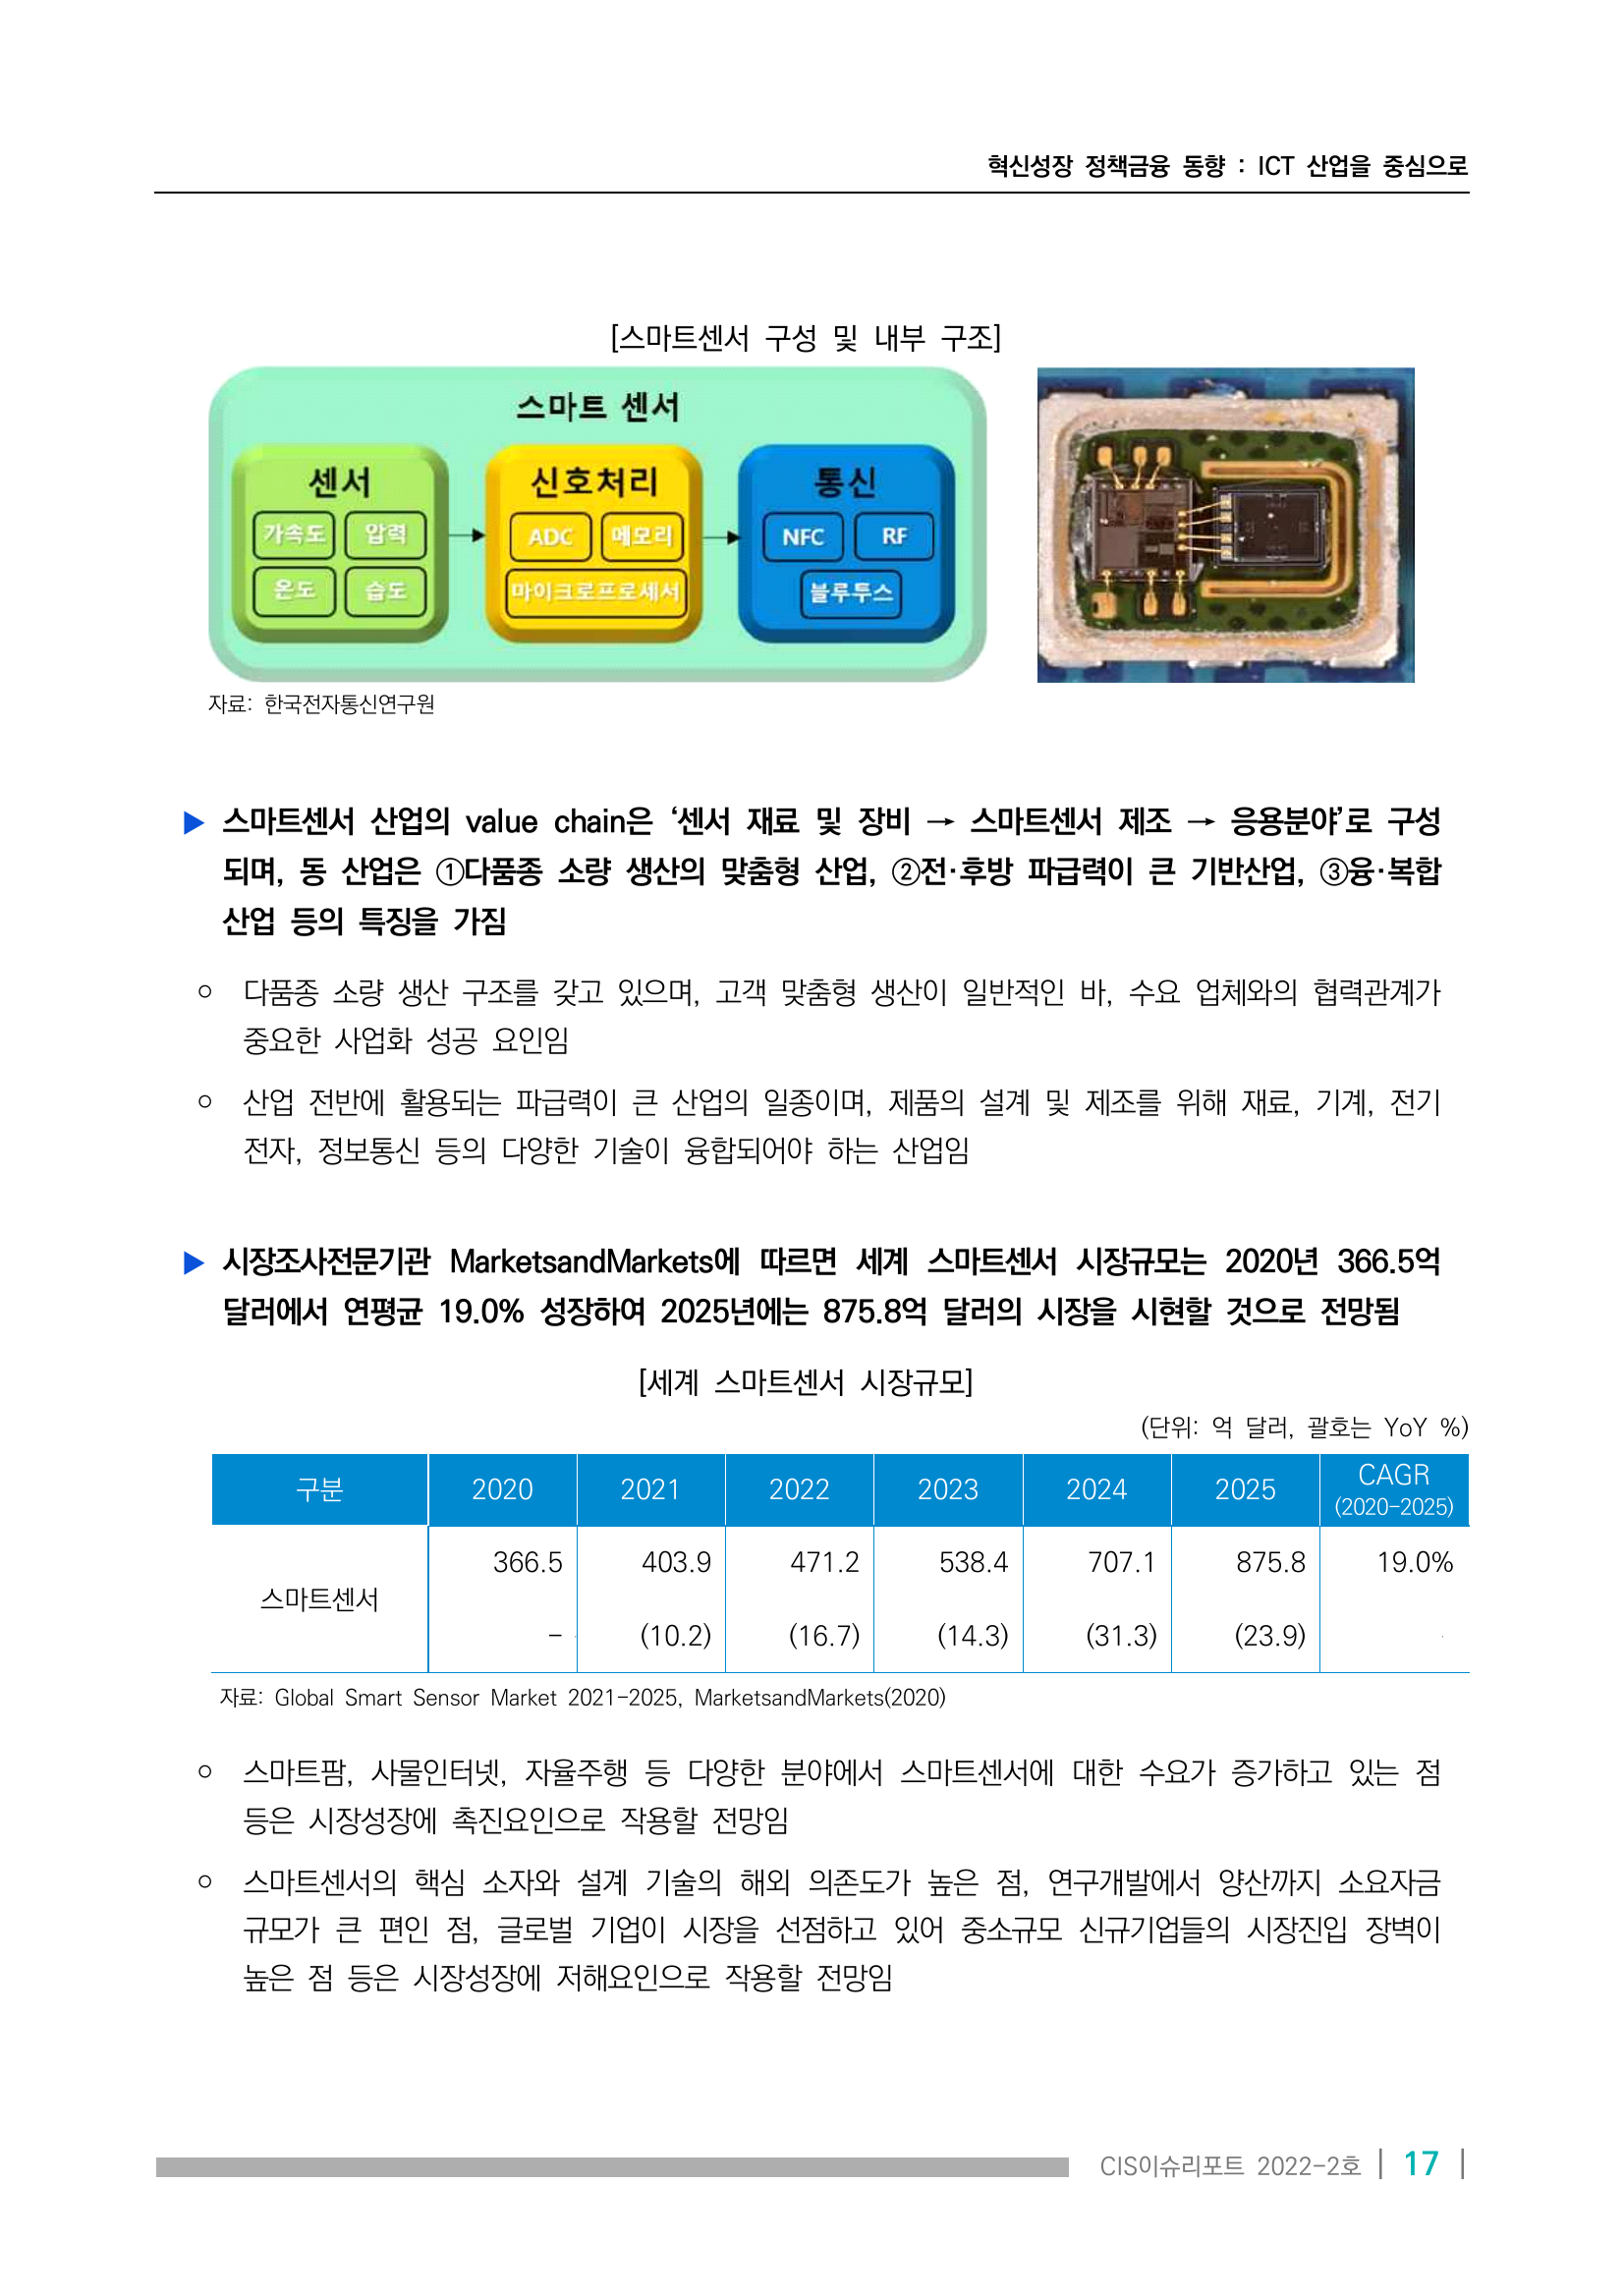

In [ ]:
from IPython.display import Image

display(Image(filename))

In [ ]:
RAG.index(
    input_path="/content/drive/MyDrive/MultimodalRAG/ai 에이전트 개념.pdf",
    index_name="korean_doc",
    store_collection_with_index=True, # set this to false if you don't want to store the base64 representation
    overwrite=True
)

In [ ]:
query = "LLM의 발전 트렌드는 어떤가요?"
results = RAG.search(query, k=1)
image_bytes = base64.b64decode(results[0].base64)

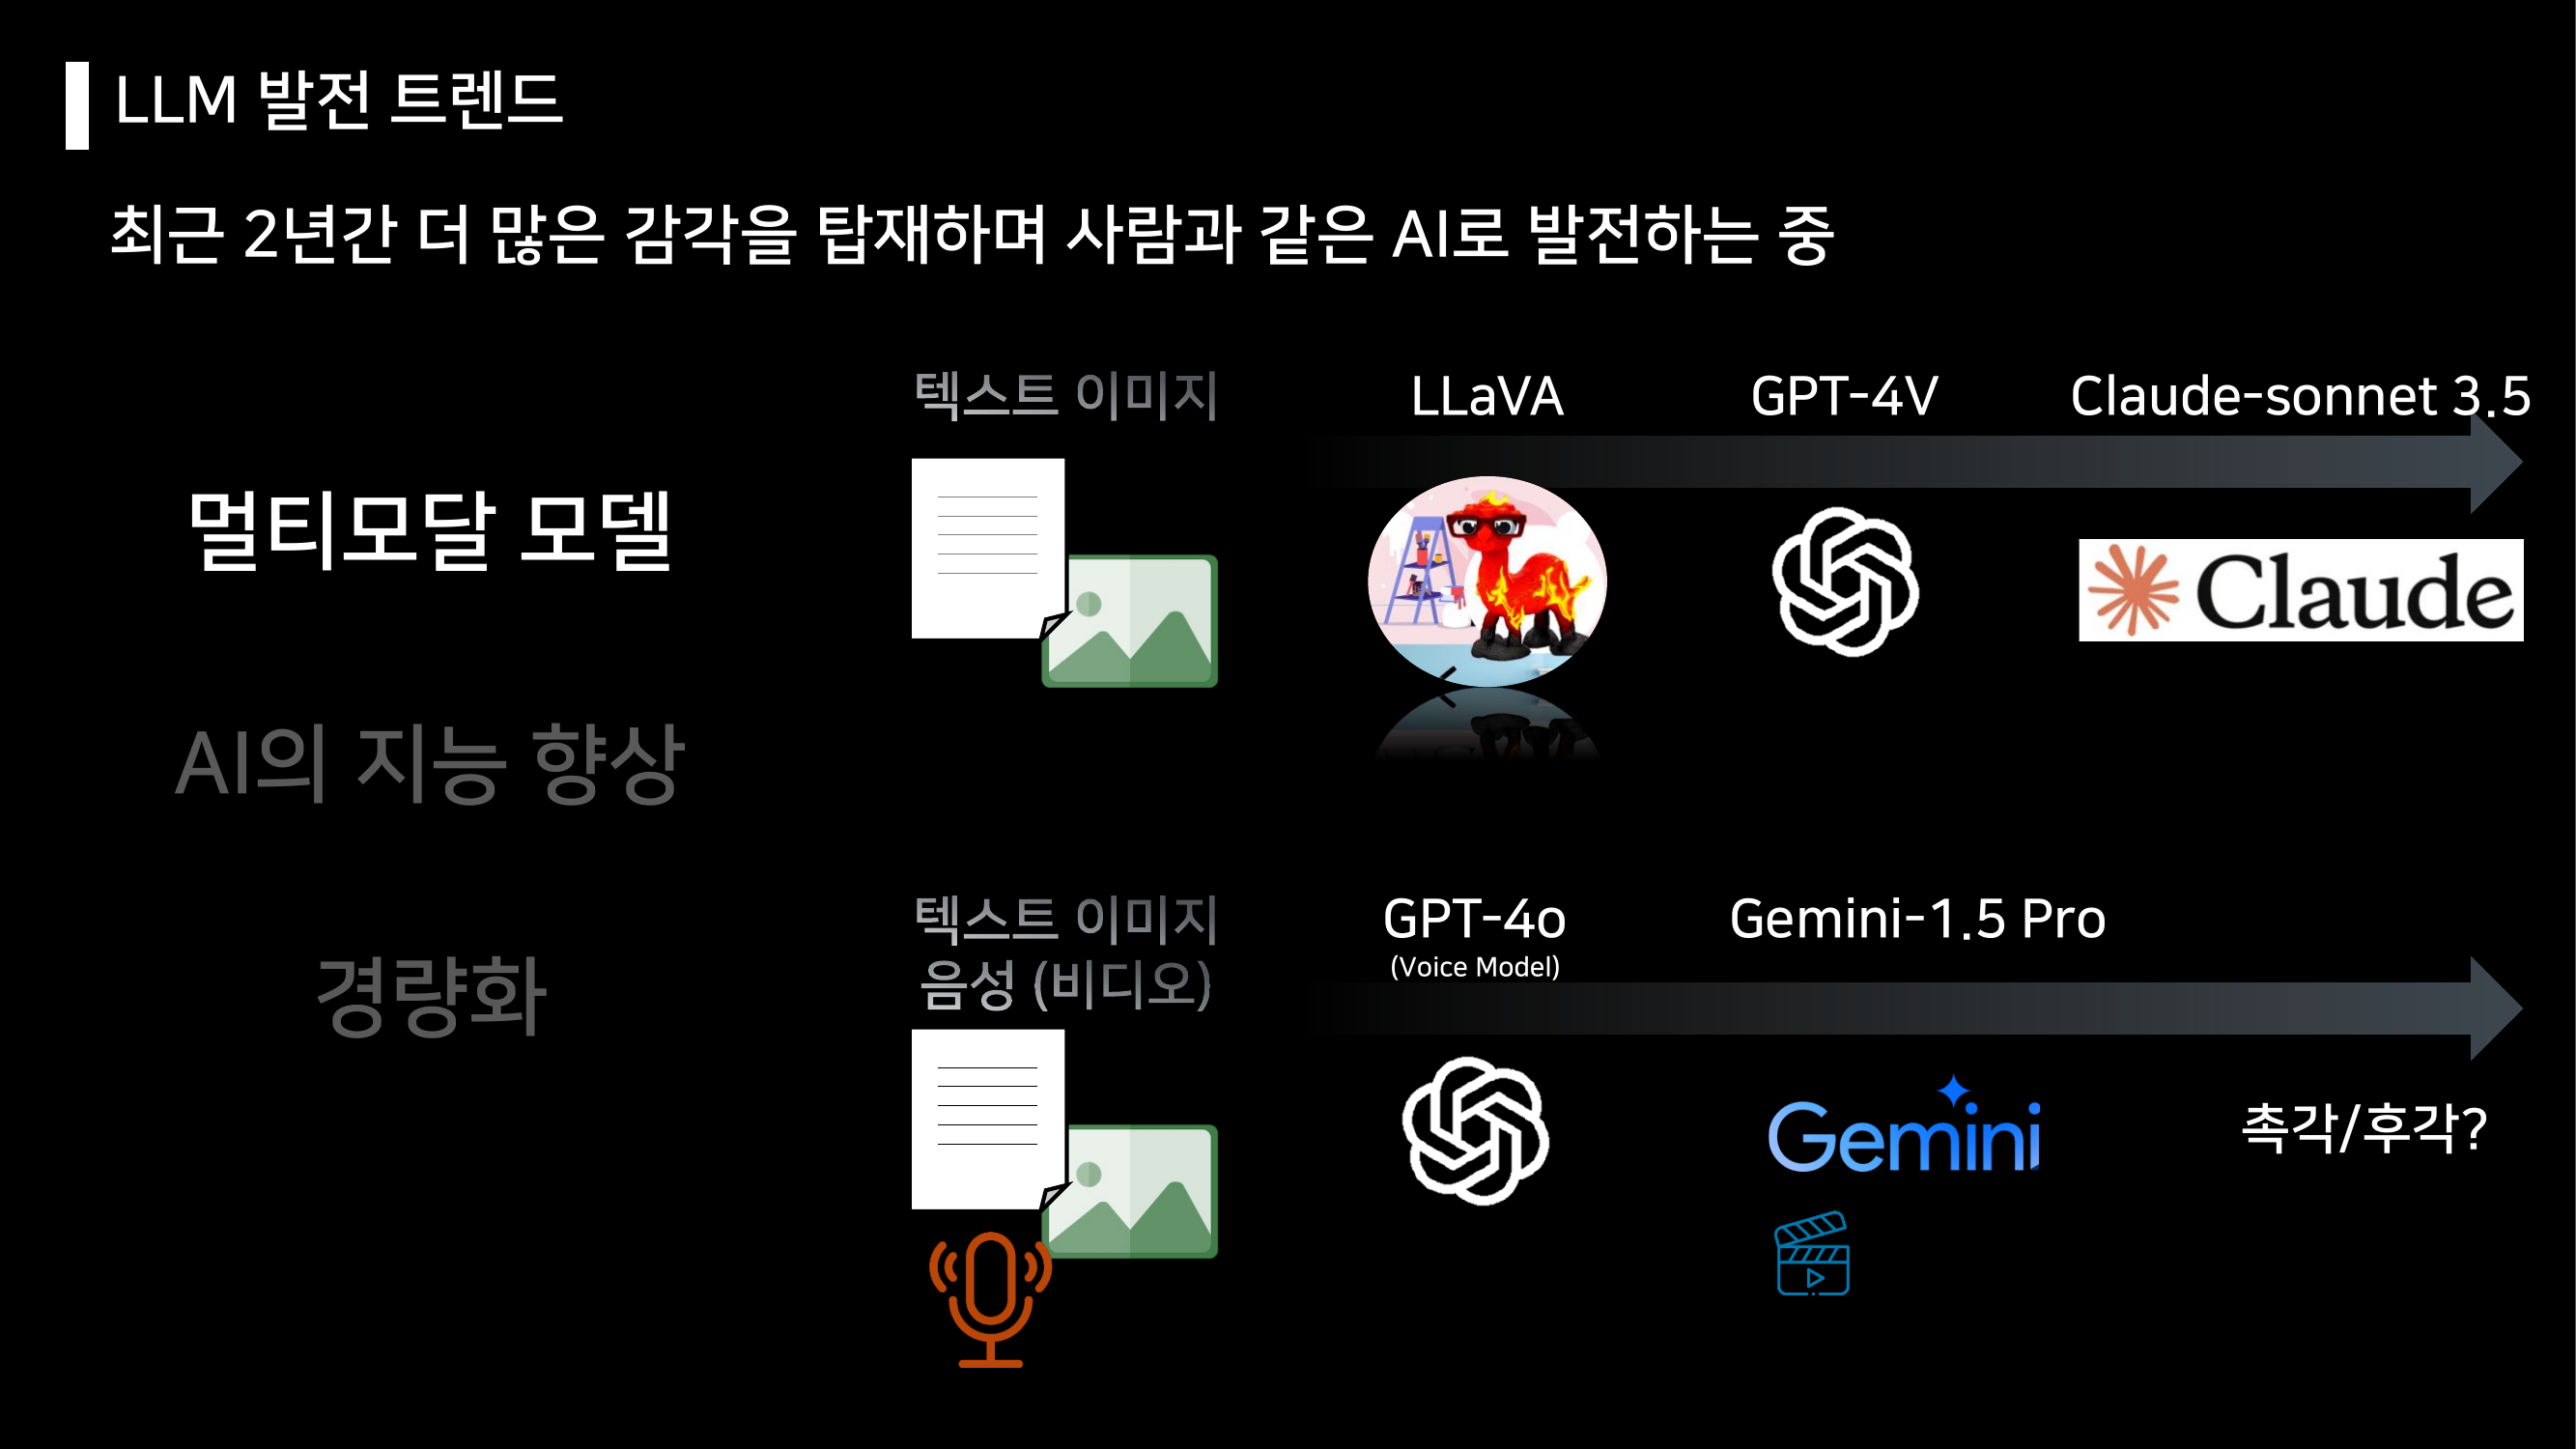

In [ ]:
filename = 'image.jpg'  # I assume you have a JPG file
with open(filename, 'wb') as f:
  f.write(image_bytes)

display(Image(filename))

### 멀티모달 모델에 이미지 보내기(OpenAI)

In [ ]:
from langchain_core.messages import SystemMessage, HumanMessage

def mm_chat(img_base64, prompt):
    """Make image summary"""
    chat = ChatOpenAI(model="gpt-4o", max_tokens=1024)

    msg = chat.invoke(
        [   SystemMessage(content="""
        You are a helpful assistant that can answer questions about images.
        Use the following pieces of retrieved image to answer the question.
        If you don't know the answer, just say that you don't know."""),
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content

mm_chat(results[0].base64, "LLM의 발전 트렌드는 어떤가요?")

'LLM(Large Language Model)의 발전 트렌드는 최근 2년간 더 많은 감각을 탐지하며 사람과 같은 AI로 발전하는 것을 목표로 하고 있습니다. 주요 트렌드는 다음과 같습니다:\n\n1. **멀티모달 모델**: 텍스트뿐만 아니라 이미지, 음성(비디오) 등의 여러 형태의 데이터를 처리할 수 있는 모델의 발전이 두드러집니다. \n   - **텍스트와 이미지**: LLaVA, GPT-4V, Claude-sonnet 3.5 등이 예시로 언급되어 있습니다.\n   - **텍스트, 이미지, 음성(비디오)**: GPT-4o (Voice Model), Gemini-1.5 Pro가 이에 해당합니다.\n\n2. **AI의 지능 향상**: AI의 인지 능력과 이해력을 향상시키는 방향으로 연구가 진행되고 있습니다.\n\n3. **경량화**: 모델의 효율성을 높이고, 더 적은 자원으로 더 높은 성능을 발휘할 수 있도록 경량화하는 노력이 진행되고 있습니다.\n\n결론적으로, LLM의 발전은 다중 감각을 처리할 수 있는 멀티모달 모델의 개발과 AI의 지능 향상, 그리고 경량화에 중점을 두고 있습니다.'

In [ ]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_chroma import Chroma
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain import hub
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_core.output_parsers import StrOutputParser

file_path = "/content/drive/MyDrive/강의 자료/[이슈리포트 2022-2호] 혁신성장 정책금융 동향.pdf"
loader = PyPDFLoader(file_path)

docs = loader.load()


llm = ChatOpenAI(model="gpt-4o")



text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
vectorstore = Chroma.from_documents(documents=splits, embedding=OpenAIEmbeddings())

retriever = vectorstore.as_retriever()

prompt = hub.pull("rlm/rag-prompt")

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

/usr/local/lib/python3.10/dist-packages/langsmith/client.py:312: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [ ]:
rag_chain.invoke("스마트센서의 구성과 내부 구조는 어떻게 돼?")

"스마트센서의 구성 및 내부 구조는 '센서 재료 및 장비 → 스마트센서 제조 → 응용분야'로 이루어집니다. 이 산업은 다품종 소량 생산 구조를 가지고 있으며, 다양한 기술이 융합되어야 합니다. 또한, 고객 맞춤형 생산이 일반적입니다."